# 多元回归分析：深入专题
---

## 数据的测度单位对OLS统计量的影响

**例子：婴儿体重的回归模型**

$$\widehat{b w g h t}=\hat{\beta}_{0}+\hat{\beta}_{1} \operatorname{cigs}+\hat{\beta}_{2}$$

其中，$bwght$表示以盎司为单位的孩子出生体重，$cigs$表示母亲在怀孕期间每天抽烟的数量，而$faminc$则表示以千美元为单位的家庭年收入。如果变量$bwghtlbs$是用磅来表示的孩子出生体重，而$packs$表示以每包烟（20支）衡量的母亲在怀孕期间每天抽烟的数量,替换这些变量到模型中，回归结果见下表。

In [1]:
import ipystata

In [2]:
%%stata

cd "D:\github\notebook\Teaching\Courses\Undergraduate\Econometrics\data"


D:\github\notebook\Teaching\Courses\Undergraduate\Econometrics\data



In [4]:
%%stata

use BWGHT, clear

* gen bwghtlbs = bwght / 16
* gen packs = cigs/20

eststo clear
eststo: quietly reg bwght cigs faminc
eststo: quietly reg bwghtlbs cigs faminc
eststo: quietly reg bwght packs faminc
esttab, se r2 sca(rss rmse)


(est1 stored)

(est2 stored)

(est3 stored)

------------------------------------------------------------
                      (1)             (2)             (3)   
                    bwght        bwghtlbs           bwght   
------------------------------------------------------------
cigs               -0.463***      -0.0290***                
                 (0.0916)       (0.00572)                   

faminc             0.0928**       0.00580**        0.0928** 
                 (0.0292)       (0.00182)        (0.0292)   

packs                                              -9.268***
                                                  (1.832)   

_cons               117.0***        7.311***        117.0***
                  (1.049)        (0.0656)         (1.049)   
------------------------------------------------------------
N                    1388            1388            1388   
R-sq                0.030           0.030           0.030   
rss              557485.5          2

## 对函数形式的进一步讨论

### 对使用对数函数形式的进一步讨论

- 对数形式有利于百分比和弹性的解释

- 近似解释与精确的百分比（$\% \Delta \hat{y}=100 \cdot\left[\exp \left(\hat{\beta}_{2} \Delta x_{2}\right)-1\right]$）

- 使用对数通常会缩小变量的取值范围，可以异常观测不那么敏感，并且减弱异方差性

- 当使用对数因变量时预测较为困难

<br>

### 含二次式的模型

最简单的情形中

$$y=\beta_{0}+\beta_{1} x+\beta_{2} x^{2}+u$$

那么

$$\Delta \hat{y} / \Delta x \approx \hat{\beta}_{1}+2 \hat{\beta}_{2} x$$

**例子：污染对住房价格的影响**

计量模型如下

$$\begin{aligned} \log (\text {price})=& \beta_{0}+\beta_{1} \log (n o x)+\beta_{2} \log (d i s t)+\beta_{3} r o o m s \\ &+\beta_{4} r o o m s^{2}+\beta_{5} \operatorname{stratio}+u \end{aligned}$$

In [7]:
%%stata

use HPRICE2, clear

gen rooms2=rooms*rooms
gen ldist=log(dist)

reg lprice lnox ldist rooms rooms2 stratio


      Source |       SS           df       MS      Number of obs   =       506
-------------+----------------------------------   F(5, 500)       =    151.77
       Model |  50.9872375         5  10.1974475   Prob > F        =    0.0000
    Residual |  33.5949875       500  .067189975   R-squared       =    0.6028
-------------+----------------------------------   Adj R-squared   =    0.5988
       Total |   84.582225       505  .167489554   Root MSE        =    .25921

------------------------------------------------------------------------------
      lprice |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        lnox |   -.901682   .1146869    -7.86   0.000     -1.12701   -.6763544
       ldist |  -.0867814   .0432807    -2.01   0.045    -.1718159    -.001747
       rooms |  -.5451128   .1654542    -3.29   0.001    -.8701839   -.2200417
      rooms2 |   .0622612    .012805     4.86   0.

<div align=center>
<img src="./pic/w007.jpg" width = "50%" />
</div>

4.3776293

7.7499072

20.202144

(bin=22, start=3.5599999, width=.23727272)



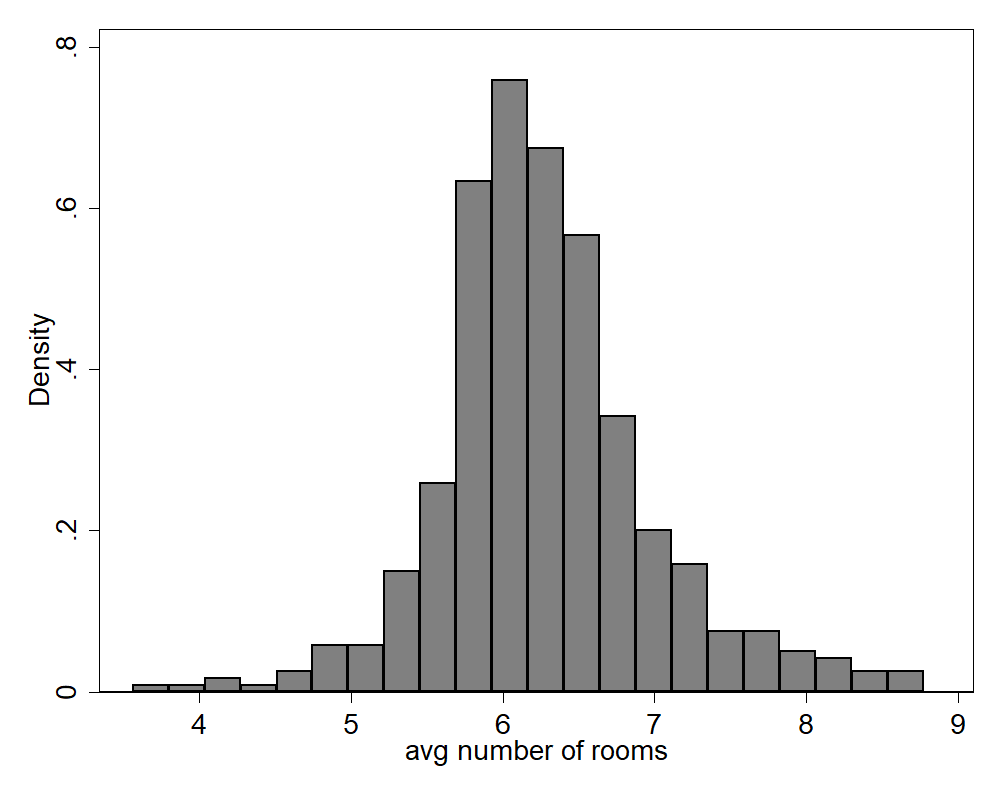

In [10]:
%%stata

* Turnaround value of rooms
display -1*_b[rooms]/(2*_b[rooms2])

* Change in price if rooms increases from 5 to 6
display 100*(_b[rooms]+2*_b[rooms2]*5)

* Change in price if rooms increases from 6 to 7
display 100*(_b[rooms]+2*_b[rooms2]*6)

hist rooms

### 含有交互项的模型

考虑包含两个解释变量和一个交互项的模型

$$y=\beta_{0}+\beta_{1} x_{1}+\beta_{2} x_{2}+\beta_{3} x_{1} x_{2}+ \mu$$

**例子：出勤率对期末考试成绩的影响**

计量模型如下

$$stndfnl=\beta_{0}+\beta_{1} \text { atndrte }+\beta_{2} \text { priGPA }+\beta_{3} A C T+\beta_{4} p r i G P A^{2} + \beta_{5} ACT^{2} + \beta_{6} priGPA \cdot atndrte + \mu$$

In [11]:
%%stata

use attend, clear

gen priGPA2=priGPA*priGPA
gen ACT2=ACT*ACT
gen priatn=priGPA*atndrte


reg stndfnl atndrte priGPA ACT priGPA2 ACT2 priatn


      Source |       SS           df       MS      Number of obs   =       680
-------------+----------------------------------   F(6, 673)       =     33.25
       Model |  152.001032         6  25.3335053   Prob > F        =    0.0000
    Residual |  512.762536       673  .761905701   R-squared       =    0.2287
-------------+----------------------------------   Adj R-squared   =    0.2218
       Total |  664.763568       679  .979033237   Root MSE        =    .87287

------------------------------------------------------------------------------
     stndfnl |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     atndrte |  -.0067129   .0102321    -0.66   0.512    -.0268035    .0133777
      priGPA |   -1.62854   .4810025    -3.39   0.001    -2.572986   -.6840939
         ACT |  -.1280394    .098492    -1.30   0.194     -.321428    .0653492
     priGPA2 |   .2959046   .1010495     2.93   0.

In [31]:
%%stata

test atndrte priatn

su priGPA


 ( 1)  atndrte = 0
 ( 2)  priatn = 0

       F(  2,   673) =    4.32
            Prob > F =    0.0137

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      priGPA |        680    2.586775    .5447141       .857       3.93



## 拟合优度和回归元选择的进一步讨论

### 调整$R^{2}$

拟合优度可以写为

$$R^{2}=1-(\mathrm{SSR} / n) /(\mathrm{SST} / n)$$

总体$R^{2}$被定义为$\rho^{2}=1-\sigma_{u}^{2} / \sigma_{y}^{2}$，那么对自由度进行修正，我们可以得到

$$\begin{aligned} \overline{R}^{2} &=1-[\operatorname{SSR} /(n-k-1)] /[\operatorname{SST} /(n-1)] \\ &=1-\hat{\sigma}^{2} /[\operatorname{SST} /(n-1)] \end{aligned}$$

$\overline{R}^{2}$的根本吸引力在于，它为在一个模型中另外增加自变量施加了惩罚。

<br>

### 利用调整$R^{2}$在两个非嵌套模型中进行选择

考虑将R&D与企业销售额相联系的两个模型

$$rdintens=\beta_{0}+\beta_{1} \log (\text {sales})+ \mu$$

$$rdintens=\beta_{0}+\beta_{1} \text {sales}+\beta_{2} \text {sales}^{2} + \mu$$

它的一个重要局限在于，我们不能用它在因变量的不同函数形式之间进行选择。

### 回归分析中控制因素过多

**中介效应**

<div align=center>
<img src="./pic/m001.png" width = "65%" />
</div>

<br>

**例子：中介效应的Stata Help案例**

This example uses the hsbdemo dataset with science as the DV, math as the IV and read as the mediator variable. That is, the model says that math influences read, which in turn influences science. This model may or may not make much substantive sense but it will allow us to to demonstrate the process of running a Sobel-Goodman test.

In [33]:
%%stata

use https://stats.idre.ucla.edu/stat/data/hsbdemo, clear

sgmediation science, mv(read) iv(math)

(highschool and beyond (200 cases))

Model with dv regressed on iv (path c)

      Source |       SS           df       MS      Number of obs   =       200
-------------+----------------------------------   F(1, 198)       =    130.81
       Model |  7760.55791         1  7760.55791   Prob > F        =    0.0000
    Residual |  11746.9421       198  59.3279904   R-squared       =    0.3978
-------------+----------------------------------   Adj R-squared   =    0.3948
       Total |     19507.5       199  98.0276382   Root MSE        =    7.7025

------------------------------------------------------------------------------
     science |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        math |     .66658   .0582822    11.44   0.000     .5516466    .7815135
       _cons |   16.75789   3.116229     5.38   0.000     10.61264    22.90315
-----------------------------------------------------

In this example the mediation effect of read was statistically significant with approximately 40% of the total effect (of math on science) being mediated.

但是中阶效应并不是因果效应。（可以参见[文档](http://webcom.upmf-grenoble.fr/LIP/Perso/DMuller/GSERM/Articles/Journal%20of%20Experimental%20Social%20Psychology%202011%20Fiedler.pdf)）

**一个案例**

In [34]:
%%stata

use WAGE2, clear

sgmediation lwage, mv(IQ) iv(edu)


Model with dv regressed on iv (path c)

      Source |       SS           df       MS      Number of obs   =       935
-------------+----------------------------------   F(1, 933)       =    100.70
       Model |  16.1377042         1  16.1377042   Prob > F        =    0.0000
    Residual |  149.518579       933  .160255712   R-squared       =    0.0974
-------------+----------------------------------   Adj R-squared   =    0.0964
       Total |  165.656283       934  .177362188   Root MSE        =    .40032

------------------------------------------------------------------------------
       lwage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        educ |   .0598392   .0059631    10.03   0.000     .0481366    .0715418
       _cons |   5.973063   .0813737    73.40   0.000     5.813366    6.132759
------------------------------------------------------------------------------

Model wit

### 增加回归元以减少误差方差